In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from tqdm import tqdm
import time
from wordcloud import WordCloud

### 비트코인과 안정자산, 위험자산의 상관관계 분석
- 데이터 산출 기간 : 2021.01.01 ~ 2024.06.01
- 안전자산 비교군 : 금, 달러
- 위험자산 비교군 : 원유
- 데이터 출처 : Yahoo Finance

In [2]:
# 기간
start_date = "2020-12-31"
end_date = "2024-06-01"
news_date_list = ["2022.03.28", "2022.11.14", "2023.04.03", "2024.01.08", "2024.03.25", "2024.05.06"]

# 종목
bitcoin = "BTC-USD"
gold = "GC=F"
usd = "KRW=X"
wti = "CL=F"
brent = "BZ=F"
sample = "080220.KQ"

In [3]:
# 원달러 티커 데이터 수집
ticker = yf.download(usd, start_date, end_date)
ticker["change"] = ticker["Adj Close"].diff()
ticker["daily_return"] = ticker["Adj Close"].pct_change()*100
ticker = ticker.dropna() # NaN 포함 행 삭제
ticker

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,change,daily_return
Date,,,,,,,,
2021-01-01,1083.500000,1088.500000,1083.500000,1084.650024,1084.650024,0,-1.770020,-0.162922
2021-01-04,1084.729980,1086.469971,1079.219971,1084.729980,1084.729980,0,0.079956,0.007372
2021-01-05,1085.609985,1089.729980,1081.670044,1086.619995,1086.619995,0,1.890015,0.174238
2021-01-06,1085.650024,1088.589966,1083.250000,1086.449951,1086.449951,0,-0.170044,-0.015649
2021-01-07,1085.250000,1096.000000,1084.829956,1086.949951,1086.949951,0,0.500000,0.046021
...,...,...,...,...,...,...,...,...
2024-05-27,1365.709961,1366.920044,1360.050049,1365.709961,1365.709961,0,-1.910034,-0.139661
2024-05-28,1360.930054,1362.810059,1354.849976,1360.930054,1360.930054,0,-4.779907,-0.349994
2024-05-29,1362.760010,1370.270020,1362.729980,1362.760010,1362.760010,0,1.829956,0.134464


In [4]:
# 금, 원유 티커 데이터 수집
# ticker = yf.download(gold, start_date, end_date)
# ticker = yf.download(wti, start_date, end_date)
# ticker["daily_return"] = ticker["Adj Close"].pct_change()*100
# ticker = ticker.dropna()
# ticker

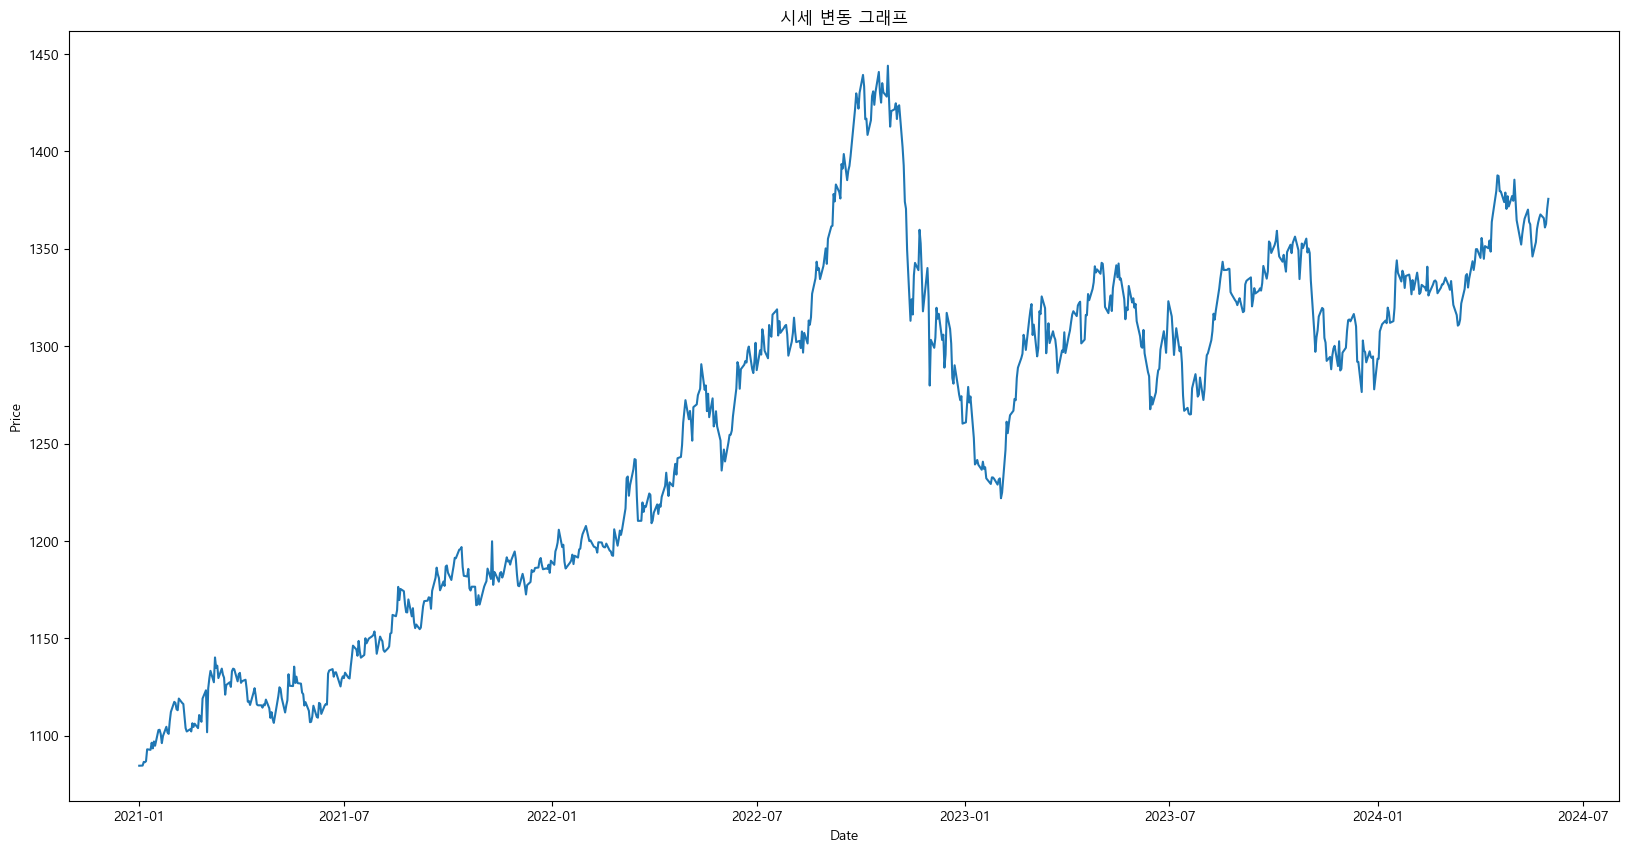

In [5]:
# daily price change graph
x = ticker.index
y = ticker["Adj Close"]

plt.rcParams["font.family"] = "Malgun Gothic"
plt.figure(figsize = (20, 10))
plt.plot(x, y)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("시세 변동 그래프")
plt.show()

In [6]:
# 주간 수익률 (=증감률)에서 변동성이 가장 큰 구간 추출
ticker_wk = yf.download(usd, start_date, end_date, interval = "1wk")
ticker_wk["weekly_return"] = ticker_wk["Adj Close"].pct_change()*100
ticker_wk = ticker_wk.dropna()
ticker_wk

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,weekly_return
Date,,,,,,,
2021-01-04,1084.729980,1098.689941,1079.219971,1092.819946,1092.819946,0,0.745805
2021-01-11,1092.819946,1104.569946,1092.160034,1102.959961,1102.959961,0,0.927876
2021-01-18,1102.959961,1107.619995,1097.079956,1099.900024,1099.900024,0,-0.277430
2021-01-25,1104.640015,1121.329956,1099.560059,1117.430054,1117.430054,0,1.593784
2021-02-01,1118.180054,1127.349976,1110.949951,1116.849976,1116.849976,0,-0.051912
...,...,...,...,...,...,...,...
2024-04-29,1377.089966,1387.650024,1344.510010,1354.430054,1354.430054,0,-1.598338
2024-05-06,1355.050049,1371.829956,1352.349976,1370.099976,1370.099976,0,1.156938
2024-05-13,1370.109985,1372.910034,1342.089966,1353.489990,1353.489990,0,-1.212319


C:\Dev\tools\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


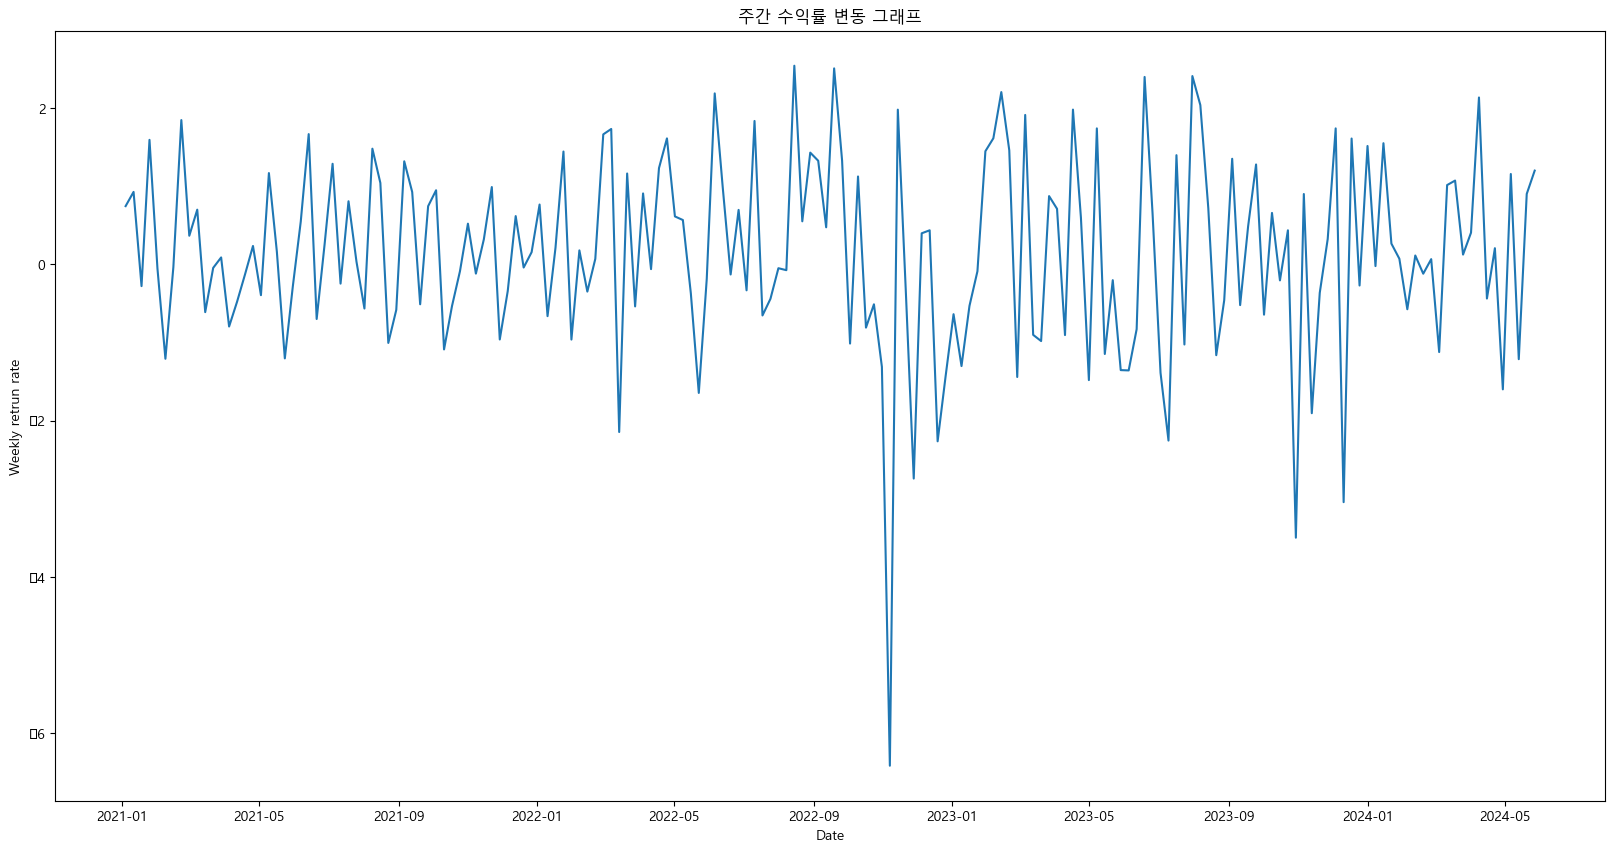

In [7]:
# weekly return rate change graph
wk_x = ticker_wk.index
wk_y = ticker_wk["weekly_return"]

plt.rcParams["font.family"] = "Malgun Gothic"
plt.figure(figsize = (20, 10))
plt.plot(wk_x, wk_y)
plt.xlabel("Date")
plt.ylabel("Weekly retrun rate")
plt.title("주간 수익률 변동 그래프")
plt.show()

In [8]:
# 상승, 하락이 관계 없는 주간 변동성 추출
ticker_chg_abs = (ticker_wk["Adj Close"].pct_change()*100).abs()
# 변동성 큰 구간 TOP6
large_chg = ticker_chg_abs.sort_values(ascending = False)
top6_chg = large_chg[:6]
top6_chg

Date
2022-11-07    6.413353
2023-10-30    3.496112
2023-12-11    3.041377
2022-11-28    2.739484
2022-08-15    2.542109
2022-09-19    2.508102
Name: Adj Close, dtype: float64

- 티커의 변동성이 큰 날짜와 특정 날짜의 네이버 뉴스 크롤링

In [9]:
top6_lst = top6_chg.index.strftime("%Y.%m.%d")
news_date_list.extend(top6_lst)
news_date_list

['2022.03.28',
 '2022.11.14',
 '2023.04.03',
 '2024.01.08',
 '2024.03.25',
 '2024.05.06',
 '2022.11.07',
 '2023.10.30',
 '2023.12.11',
 '2022.11.28',
 '2022.08.15',
 '2022.09.19']

In [10]:
news_titles = []
search = input("뉴스 검색어 입력 (ex. 비트코인 달러) : ")

driver = wb.Chrome()
driver.maximize_window()
for i in tqdm(range(len(news_date_list))) :
    driver.get(f"https://search.naver.com/search.naver?where=news&query={search}&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={news_date_list[i]}&de={news_date_list[i]}&docid=&related=0&mynews=0&office_type=0&office_section_code=0")
    
    body = driver.find_element(By.TAG_NAME, "body")
    try :
        # 스크롤
        for _ in range(10) :
            body.send_keys(Keys.END)
            time.sleep(1)
            
        # 뉴스 타이틀 수집
        titles = driver.find_elements(By.CSS_SELECTOR, "a.news_tit")
        for i in titles :
            news_titles.append(i.text)
    except Exception as e :
        print("오류 : ", e)
print("완료😇")
driver.quit()

100%|██████████| 12/12 [02:14<00:00, 11.22s/it]


완료😇


In [11]:
print(len(news_titles))
print(news_titles)

268
['[비트코인 지금] 석달여만에 4만6700달러 돌파…거래량 76% ↑', '비트코인 1월 6일 이후 처음으로 4만6000달러 돌파(상보)', '[코인시황] 비트코인, 호재 이어지며 석 달 만에 5600만원 돌파', '“지금이 저점 매수 타이밍?”, 기관 움직임에 비트코인 상승 시동 걸었다', '[가상화폐 전망] "비트코인 시세 5181만1000원이 하방 지지선"', '[특징주]비덴트, 비트코인 4만6000달러 돌파 속 2% 상승', '[코인시황] 러-우 사태 완화 조짐…비트코인 3개월 만에 5600만원', '[오늘의 코인] 우크라이나 리스크 해소 조짐, 시장 상승세', '영국, 가상화폐 규제안 발표 임박…“스테이블코인에 초점”', '비트코인, 현물 매수세에 힘입어 상승세 지속', '코스피, 亞 개장 후 소폭 낙폭 축소…비트코인 5천600만원대', '우크라이나 돕기 가상화폐 기부 이어져...비트코인 5400만원대서 거래 강세', '뉴욕증시 비트코인 폭발, 러시아 가상화폐 원유결제+ 우크라 휴전 급물살', '[글로벌 마켓] 뉴욕증시, 재료 부재 속 장중 등락 반복…혼조 마감', '‘약보합’ 코스피, 4월에는 봄볕 드나…가상화폐는 ‘훈풍’', '[WEEKLY BIZ LETTER] 세계경제 빈곤이 몰려온다', '코스피, 0.2% 상승…中 증시 영향', "아디다스 자체 NFT 'ITM' 시총 1억 달러 돌파 등", "'주린이'도 알아야 할 기재차관의 위기감별법", '코스피, 2,720대 보합권 마감…개인 매수·外人 매도', "'주린이'도 알아야 할 기재차관의 위기감별법", '코스피, 2,720대 보합권 마감…개인 매수·外人 매도', '[신세돈의 돈이 보이는 경제 (1)] 돈·돈·돈, 돈은 무엇인가', '오늘 금시세 33만 1천원대, KRX금시장 금거래량은 오히려 감소세', '코스피, 0.6%대 하락 출발…연준 매파 발언·상하이 봉쇄', '[뉴욕모닝브리핑](3월28일)', '옐런 美 재무장관, "가상화폐 시장 우려 여전히 유효"', '[금일 금융권 주요기사] "

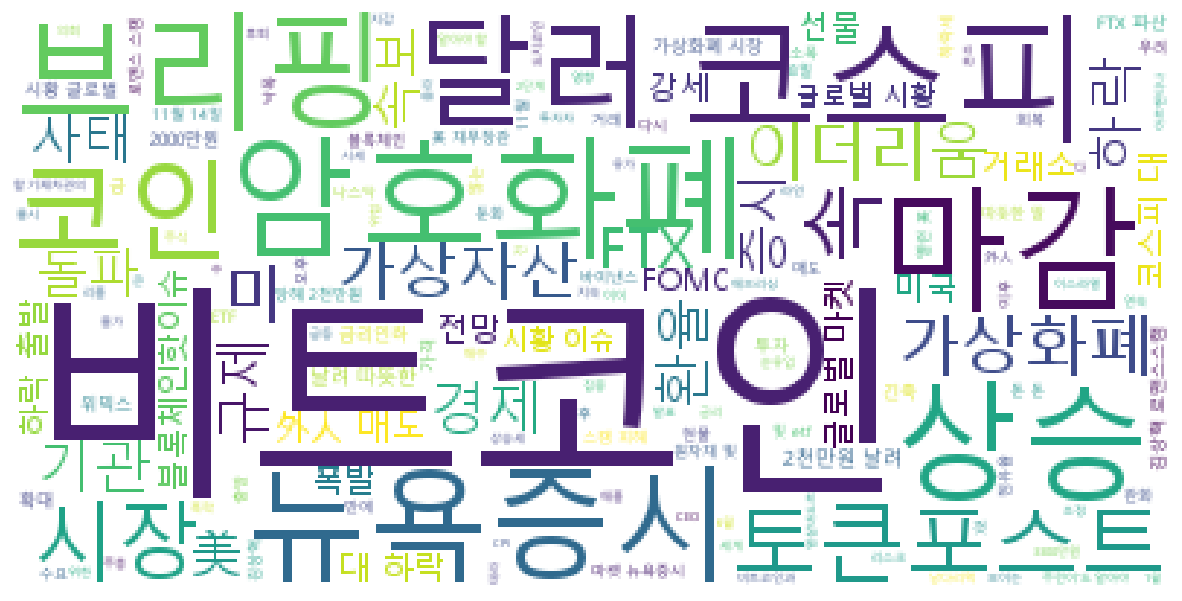

In [12]:
# 워드클라우드를 통해 핵심 키워드 시각화
text = ",".join(news_titles)
f_path = "C:\Windows\Fonts\malgun.ttf"

wc = WordCloud(font_path = f_path, random_state = 42, background_color = "white")
wc.generate(text)
plt.figure(figsize = (15, 10))
plt.axis("off")
plt.imshow(wc, interpolation = "None")
plt.show()

### 테스트 코드
- 종목 : 제주반도체

In [13]:
# 코스피 : .KS
# 코스닥 : .KQ

# 증권 데이터
# 일별
jeju = yf.download(sample, start_date, end_date)
# 주간
# jeju = yf.download(sample, start_date, end_date, interval = "1wk")

# 컬럼 추가 (증감량)
# diff() : 행과 행의 차이
jeju["change"] = jeju["Adj Close"].diff()#.abs() 상승, 하락 관계 없으면 절대 값 사용

# 컬럼 추가 (수익률)
# pct_change() : (다음행 - 현재행) ÷ 현재행
jeju["daily_return"] = jeju["Adj Close"].pct_change()*100
jeju

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,change,daily_return
Date,,,,,,,,
2021-01-04,3770.0,3790.0,3700.0,3740.0,3740.0,770788,NaN,NaN
2021-01-05,3740.0,3740.0,3655.0,3700.0,3700.0,490077,-40.0,-1.069519
2021-01-06,3705.0,3995.0,3705.0,3815.0,3815.0,4105868,115.0,3.108108
2021-01-07,3865.0,4655.0,3825.0,4180.0,4180.0,28056870,365.0,9.567497
2021-01-08,4230.0,4285.0,4060.0,4205.0,4205.0,4812752,25.0,0.598086
...,...,...,...,...,...,...,...,...
2024-05-27,20800.0,21100.0,20300.0,21000.0,21000.0,1054767,300.0,1.449275
2024-05-28,21200.0,21200.0,20800.0,21150.0,21150.0,778921,150.0,0.714286
2024-05-29,21400.0,24300.0,21200.0,22700.0,22700.0,8155709,1550.0,7.328605


In [14]:
# Yahoo Finance 뉴스 데이터
jeju_ticker = yf.Ticker(sample)
jeju_news = jeju_ticker.news
for i in range(len(jeju_news)) :
    print(jeju_news[i]['title'])

Energy Private Equity Expert Francois Feuillat Joins Bracewell in London
President of Azerbaijan Breaks Ground on Masdar 1GW Solar and Wind Projects
Modi celebrates victory in India vote, but falls short of landslide
Bad News Is Good News?
Maine company plans to launch small satellites starting in 2025
Jobs data reflects healthy post-COVID stabilization: Analyst
Homes For Heroes Kingston Veterans’ Village Grand Opening
With 88% ownership of the shares, Energy Recovery, Inc. (NASDAQ:ERII) is heavily dominated by institutional owners


In [15]:
# 특정 기간 수익률 계산 함수
def period_return(ticker_arg, start_d, end_d) :
    data = yf.download(ticker_arg, start = start_d, end = end_d)
    # 시작일, 종료일의 종가 -> 위치 인덱싱 사용
    start_price = data["Adj Close"].iloc[0] # DF의 첫 번째 행
    end_price = data["Adj Close"].iloc[-1] # DF의 마지막 행
    # 수익률 계산
    return (end_price - start_price) / start_price * 100

In [16]:
period_return(sample, "2024-02-15", "2024-06-04")

[*********************100%%**********************]  1 of 1 completed


-32.96875

In [17]:
max_change_idx = jeju["change"].idxmax().strftime("%Y-%m-%d") # change 컬럼에서 최댓값의 인덱스 반환
max_change_idx

'2024-03-28'

In [18]:
top10_change = jeju.nlargest(10, 'change') # change 컬럼에서 상위 10개 값의 row 추출
top10_change

,Open,High,Low,Close,Adj Close,Volume,change,daily_return
Date,,,,,,,,
2024-03-28,23500.0,29000.0,23050.0,28600.0,28600.0,27918940,5250.0,22.483940
2024-01-19,23150.0,26950.0,21900.0,26250.0,26250.0,38373060,5000.0,23.529412
2024-01-22,27900.0,31600.0,27550.0,30700.0,30700.0,25971060,4450.0,16.952381
2024-01-15,17840.0,21250.0,17510.0,21150.0,21150.0,22329970,3100.0,17.174515
2024-01-24,31050.0,34850.0,29550.0,33800.0,33800.0,14980960,3100.0,10.097720
2024-01-02,13370.0,16990.0,13150.0,16700.0,16700.0,24147850,3000.0,21.897810
2024-02-06,24650.0,29200.0,22200.0,27450.0,27450.0,27558960,2950.0,12.040816
2024-02-14,28950.0,33400.0,28850.0,32300.0,32300.0,17882320,2400.0,8.026756
2023-12-08,9300.0,11620.0,9020.0,11280.0,11280.0,36652960,2340.0,26.174497


In [19]:
top10_change.index

DatetimeIndex(['2024-03-28', '2024-01-19', '2024-01-22', '2024-01-15',
               '2024-01-24', '2024-01-02', '2024-02-06', '2024-02-14',
               '2023-12-08', '2024-03-04'],
              dtype='datetime64[ns]', name='Date', freq=None)